In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import copy
import os

# get data ready

In [2]:
def get_data_ready():
# clean_complaint=pd.read_csv('saved_steps/clean_complaint.csv')
    res1=pd.read_csv('outputs/res1.csv')
    res2=pd.read_csv('outputs/res2.csv')
    res3=pd.read_csv('outputs/res3.csv')

    #change names
    name_dict={'East_JLM_lines':'East'+' '+'JLM'+' '+'lines', 
            'service_types': 'Service'+' '+'types', 
        'Socioeconomic_ranking':'Socioeconomic'+' '+'status', 
        'Ultraorthodox_buses':'percent of Ultraorthodox',
        'Directness_measurements':'Line'+' '+'Directness', 
        'Settlements_lines':'West'+' '+'Bank'+' '+'Settlements',
        'West_metropolin_lines':'West'+' '+'metropolitan'+' '+'area', 
        'InJerusalem_lines':'City'+' '+'of'+' '+'Jerusalem',
        'percent_problematic_trips':'Percentage'+' '+'of'+' '+'system'+' '+'detected'+' '+'incidents',
        'number_of_complaints':'Number'+' '+'of'+' '+'complaints',
        'passengersnumber_thousands':'Total'+' '+'number'+' '+'of'+' '+'passengers',
        'day_period':'Day'+' '+'periods'
    }
    flipped = dict((v,k) for k,v in name_dict.items())
    for res in [res1, res2, res3]:
        res.rename(columns=name_dict, inplace=True)
        
    return res1, res2, res3

In [3]:
# get haredy ready

# haredi_path="C:/thesis/data/pop_jlm/ultraorthodox_lines.xlsx"
# haredi=pd.read_excel(haredi_path).astype({'מק"ט קו':str})

# 'res3_tocomplete[['routeid', 'direction']]=res3_tocomplete['routeid_direction'].str.split('-', expand=True)

# haredi.rename(columns={'"קו חרדי"=1':'is_ultraorthodox', 'מק"ט קו':'routeid'}, inplace=True)
# haredi.head()
# res3=pd.merge(res3_tocomplete, haredi[['routeid', 'is_ultraorthodox']], on='routeid', how='left')
# res3.fillna(0, inplace=True)

# functions

In [4]:
def remove_outliars(df, col):
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    cropped = df[(df[col] < q_hi) & (df[col] > q_low)]
    return cropped

In [5]:
def hist(res1, res2,res3, col_name, name):
# Generate some random data for demonstration
    x1 = res1[col_name]

    x2 = res2[col_name]

    x3 = res3[col_name]

    # Create a figure and three subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)

    # Loop to plot each xy plot
    for i, (x) in enumerate([(x1), (x2), (x3,)]):
        axs[i].hist(x)
        axs[i].set_title(f'res {i+1}')
        axs[i].set_xlabel('number of buslines')
        axs[i].set_ylabel('number of complaints filed against')
    # Adjust layout to prevent overlapping
    fig.suptitle(f'Bus lines distribution, \nby number of complaints filed against them', fontsize=20)

    plt.tight_layout()

    plt.savefig(f'graphs/{name}.jpg') # export to file
    plt.show()

In [6]:
def continous_variables(col_name, grouping_method, x_suplabel):
# Create a figure and three subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)

    # Loop to plot each xy plot
    for i, res in enumerate([res1, res2, res3]):
        res=remove_outliars(res, 'Number of complaints')
        res=remove_outliars(res, col_name)

        axs[i].scatter(x=res[col_name], y=res['Number of complaints'], marker='o')
        axs[i].set_title(f'res {i+1}')

    # Adjust layout to prevent overlapping

    # add main titles
    fig.suptitle(f'Number of complaints per bus line, by {grouping_method}', fontsize=20)
    fig.supxlabel(f'{x_suplabel}', fontsize=15)
    fig.supylabel('Number of complaints per bus line', fontsize=15)

    plt.tight_layout()
    plt.savefig(f'graphs/{col_name}.jpg', dpi=1000) # export to file
    plt.show()

In [7]:
def boxplot(axs, i, type, other):
        VP = axs[i].boxplot([type, other],  patch_artist=True,
                        showmeans=True, showfliers=False,
                        medianprops={"color": "black", "linewidth":2},
                        meanprops={"linewidth":0.5, 'marker':'s', "markerfacecolor": "red", "markeredgecolor": "black"},
                        boxprops={"facecolor": "C0", "edgecolor": "white",
                                "linewidth": 0.5},
                        whiskerprops={"color": "C0", "linewidth": 1.5},
                        capprops={"color": "C0", "linewidth": 1.5})

        axs[i].yaxis.grid(True)
        legend_elements = [Line2D([0], [0], marker='s', color='black', label='Mean', markersize=10, markerfacecolor='red'),
                        Line2D([0], [0], marker=',', color='black', label='Median', markersize=10, markerfacecolor='black')
                        ]
        axs[i].legend(handles=legend_elements)

In [8]:
#service types
def geographic_demographic(col_name, grouping_method, x_suplabel, x_labels):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))#, sharex=True, sharey=True)
    
    for i, res in enumerate([res1, res2, res3]):
        res=remove_outliars(res, 'Number of complaints')
    # Loop to plot each xy plot
        type=res.loc[res[f'{col_name}'] == 1]['Number of complaints']
        other=res.loc[res[f'{col_name}'] == 0]['Number of complaints']
        
        VP = axs[i].boxplot([type, other],  patch_artist=True,
                        showmeans=True, showfliers=False,
                        medianprops={"color": "black", "linewidth":2},
                        meanprops={"linewidth":0.5, 'marker':'s', "markerfacecolor": "red", "markeredgecolor": "black"},
                        boxprops={"facecolor": "C0", "edgecolor": "white",
                                "linewidth": 0.5},
                        whiskerprops={"color": "C0", "linewidth": 1.5},
                        capprops={"color": "C0", "linewidth": 1.5})

        axs[i].yaxis.grid(True)
        legend_elements = [Line2D([0], [0], marker='s', color='black', label='Mean', markersize=10, markerfacecolor='red'),
                        Line2D([0], [0], marker=',', color='black', label='Median', markersize=10, markerfacecolor='black')
                        ]
        axs[i].legend(handles=legend_elements)
        axs[i].set_title(f'res {i+1}')
        axs[i].set_xticklabels(x_labels, fontsize=13)

    fig.suptitle(f'Number of complaints, grouped by {grouping_method}', fontsize=20)
    fig.supxlabel(f'{x_suplabel}', fontsize=15)
    fig.supylabel('Number of complaints per bus line', fontsize=15)
    plt.tight_layout()
    plt.savefig(f'graphs/{col_name}.jpg', dpi=1000) # export to file

    plt.show()

In [9]:
#service areas
def service_areas():
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))#, sharex=True, sharey=True)
    axs = axs.flatten()
    i=0
    for int, res in enumerate([res1, res2, res3]):
        res=remove_outliars(res, 'Number of complaints').copy()
        # Create a figure and three subplots

        # Loop to plot each xy plot
        for int2, service in enumerate(['City of Jerusalem', 'West Bank Settlements', 'West metropolitan area']):
            type=res.loc[res[f'{service}'] == 1]['Number of complaints']
            other=res.loc[res[f'{service}'] == 0]['Number of complaints']
        #     fig, ax = plt.subplots()
            VP = axs[i].boxplot([type, other],  patch_artist=True,
                            showmeans=True, showfliers=False,
                            medianprops={"color": "black", "linewidth":2},
                            meanprops={"linewidth":0.5, 'marker':'s', "markerfacecolor": "red", "markeredgecolor": "black"},
                            boxprops={"facecolor": "C0", "edgecolor": "white",
                                    "linewidth": 0.5},
                            whiskerprops={"color": "C0", "linewidth": 1.5},
                            capprops={"color": "C0", "linewidth": 1.5})

            axs[i].yaxis.grid(True)
            legend_elements = [Line2D([0], [0], marker='s', color='black', label='Mean', markersize=10, markerfacecolor='red'),
                            Line2D([0], [0], marker=',', color='black', label='Median', markersize=10, markerfacecolor='black')
                            ]

            axs[i].legend(handles=legend_elements)
            axs[i].set_xticklabels([f'{service}', 'other'], fontsize=13)

            if i % 3 == 1:  # Middle plot of each row (i=1, 4, 7)
                axs[i].set_title(f'Resolution {int+1}', loc='center', fontsize=16, pad=20)
            else:
                axs[i].set_title('', loc='center', fontsize=16, pad=20)                 
            i+=1
        
            # axs[i].set_xticklabels([f'{x}', 'other_types'], fontsize=13)
    fig.suptitle('Number of complaints, grouped by service areas', fontsize=20)
    # fig.supxlabel('geographic area', fontsize=15)
    fig.supylabel('Number of complaints per bus line', fontsize=15)
    plt.tight_layout()
    plt.savefig(f'graphs/service_area.jpg', dpi=1000) # export to file

    plt.show()

In [10]:
#service types
def service_types():
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))#, sharex=True, sharey=True)
    axs = axs.flatten()
    i=0
    for int, res in enumerate([res1, res2, res3]):
        res=remove_outliars(res, 'Number of complaints').copy()
        # Create a figure and three subplots
        res['Inner-city']=np.where(res['Service types']==3,1,0)
        res['Inter-city']=np.where(res['Service types']==1,1,0)
        res['Regional']=np.where(res['Service types']==2,1,0)
        categories=['Inner-city', 'Inter-city', 'Regional']

        # Loop to plot each xy plot
        for int2, service in enumerate(categories):
            type=res.loc[res[f'{service}'] == 1]['Number of complaints']
            other=res.loc[res[f'{service}'] == 0]['Number of complaints']
        #     fig, ax = plt.subplots()
            VP = axs[i].boxplot([type, other],  patch_artist=True,
                            showmeans=True, showfliers=False,
                            medianprops={"color": "black", "linewidth":2},
                            meanprops={"linewidth":0.5, 'marker':'s', "markerfacecolor": "red", "markeredgecolor": "black"},
                            boxprops={"facecolor": "C0", "edgecolor": "white",
                                    "linewidth": 0.5},
                            whiskerprops={"color": "C0", "linewidth": 1.5},
                            capprops={"color": "C0", "linewidth": 1.5})

            axs[i].yaxis.grid(True)
            legend_elements = [Line2D([0], [0], marker='s', color='black', label='Mean', markersize=10, markerfacecolor='red'),
                            Line2D([0], [0], marker=',', color='black', label='Median', markersize=10, markerfacecolor='black')
                            ]

            axs[i].legend(handles=legend_elements)
            axs[i].set_xticklabels([f'{service}', 'other'], fontsize=13)

            if i % 3 == 1:  # Middle plot of each row (i=1, 4, 7)
                axs[i].set_title(f'Resolution {int+1}', loc='center', fontsize=16, pad=20)
            else:
                axs[i].set_title('', loc='center', fontsize=16, pad=20)                 
            i+=1
        
            # axs[i].set_xticklabels([f'{x}', 'other_types'], fontsize=13)
    fig.suptitle(f'Number of complaints, grouped by service type', fontsize=20)
    # fig.supxlabel('geographic area', fontsize=15)
    fig.supylabel('Number of complaints per bus line', fontsize=15)
    plt.tight_layout()
    plt.savefig(f'graphs/service_type.jpg', dpi=1000) # export to file

    plt.show()

In [11]:
def day_periods():
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))#, sharex=True, sharey=True)

    res=remove_outliars(res1, 'Number of complaints').copy()
    # Create a figure and three subplots
    res['High noon']=np.where(res['Day periods']==3,1,0)
    res['Low hours']=np.where(res['Day periods']==1,1,0)
    res['High Morning']=np.where(res['Day periods']==2,1,0)

    # Loop to plot each xy plot
    for i, service in enumerate(['High noon', 'Low hours', 'High Morning']):
        type=res.loc[res[f'{service}'] == 1]['Number of complaints']
        other=res.loc[res[f'{service}'] == 0]['Number of complaints']
    #     fig, ax = plt.subplots()
        VP = axs[i].boxplot([type, other],  patch_artist=True,
                        showmeans=True, showfliers=False,
                        medianprops={"color": "black", "linewidth":2},
                        meanprops={"linewidth":0.5, 'marker':'s', "markerfacecolor": "red", "markeredgecolor": "black"},
                        boxprops={"facecolor": "C0", "edgecolor": "white",
                                "linewidth": 0.5},
                        whiskerprops={"color": "C0", "linewidth": 1.5},
                        capprops={"color": "C0", "linewidth": 1.5})
        axs[i].set_xticklabels([f'{service}', 'other'], fontsize=13)

        axs[i].yaxis.grid(True)
        legend_elements = [Line2D([0], [0], marker='s', color='black', label='Mean', markersize=10, markerfacecolor='red'),
                        Line2D([0], [0], marker=',', color='black', label='Median', markersize=10, markerfacecolor='black')
                        ]
        axs[i].legend(handles=legend_elements)

    fig.suptitle('Number of complaints, grouped by day period - high noon/low/high afternoon', fontsize=20)
    fig.supylabel('Number of complaints per bus line', fontsize=15)

    plt.tight_layout()
    plt.savefig(f'graphs/day_periods.jpg', dpi=1000) # export to file

    plt.show()

In [23]:
def create_specific_comparison(res3):

    agg_dict={
    'Number of complaints':'mean',
    'Number of bus lines':'nunique',
    'Total number of passengers':'mean',
    'Percentage of system detected incidents':'mean',
    'Line Directness':'mean',
    'socioeco_2019':'mean'
    }

    res3_copy=res3.copy()

    res3_copy['group']=None

    res3_copy.loc[res3_copy['West Bank Settlements']==1, 'group']='West Bank Settlements'
    res3_copy.loc[res3_copy['West metropolitan area']==1, 'group']='West metropolitan area'
    res3_copy.loc[res3_copy['City of Jerusalem']==1, 'group']='Jerusalem (without East Jerusalem)'
    res3_copy.loc[res3_copy['East JLM lines']==1, 'group']='East Jerusalem'

    res3_copy.rename(columns={'routeid_direction': 'Number of bus lines'}, inplace=True)

    grouped=res3_copy.groupby(['group'], as_index=False).agg(agg_dict).round(2)

 
    #service types
    fig, axs = plt.subplots(3, 2, figsize=(22, 10)
    , sharex=True)#, sharey=True)
    axs = axs.flatten()

    for ax, measurement in enumerate(grouped.columns):
        if measurement!='group':
            ax=ax-1
            if measurement=='Number of complaints':
                color='blue'
            else:
                color='maroon'
            axs[ax].bar(grouped['group'], grouped[measurement], color = color, 
                            width = 0.4)
            axs[ax].set_title(f'{measurement}', fontsize=18)
            axs[ax].yaxis.grid(True)

    # fig.suptitle(f'Comparison by Demographic factors-Averaged values', fontsize=20)
    plt.rcParams['xtick.labelsize'] = 12

    plt.tight_layout()
    plt.savefig(f'graphs/specific_comparison.jpg', dpi=1000) # export to file

    plt.show()



# Draw graphs


In [12]:
res1, res2, res3=get_data_ready()

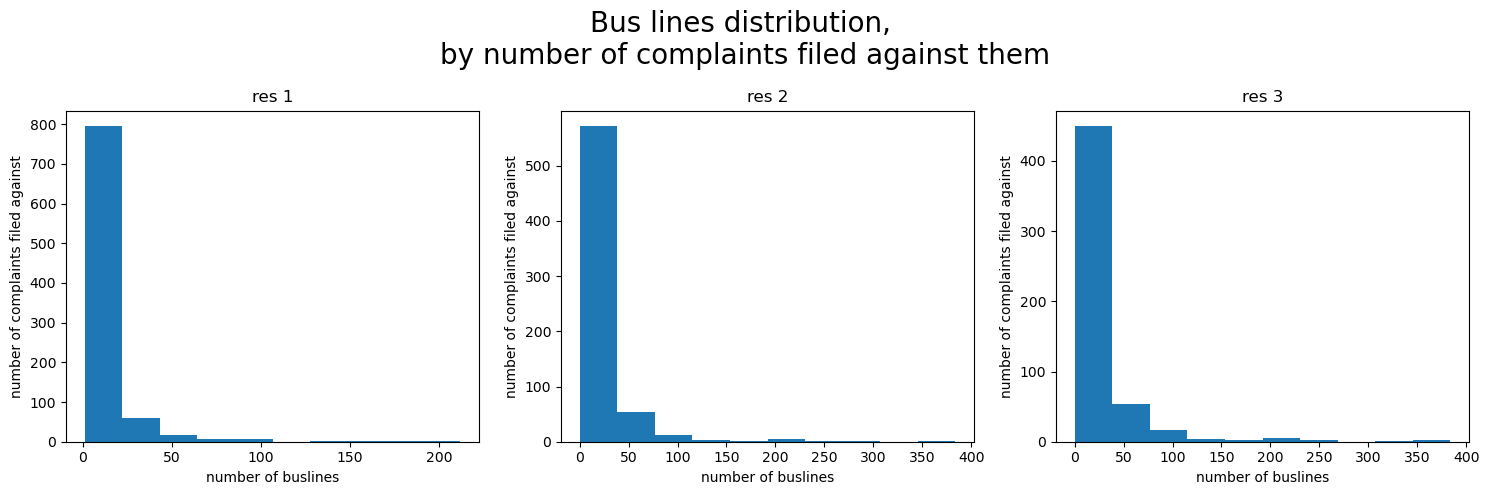

In [28]:
hist(res1, res2,res3, 'Number of complaints', 'complaints_hist')

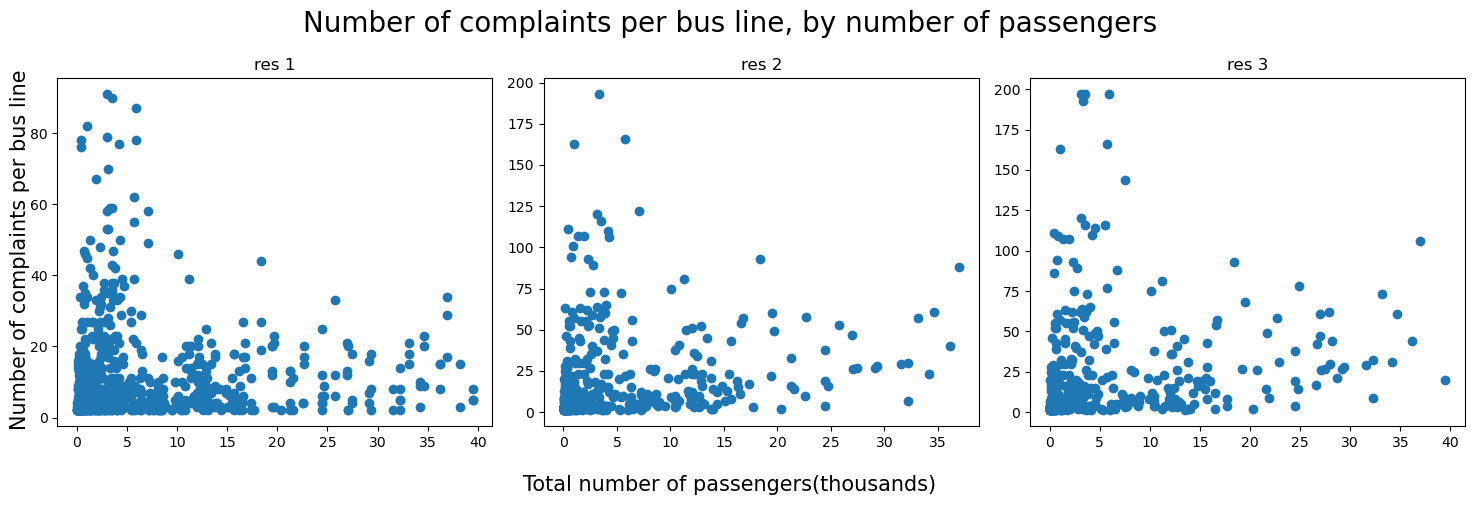

In [29]:
# passengersnumber_thousands
continous_variables(
    col_name='Total number of passengers',
    grouping_method='number of passengers',
    x_suplabel='Total number of passengers(thousands)')

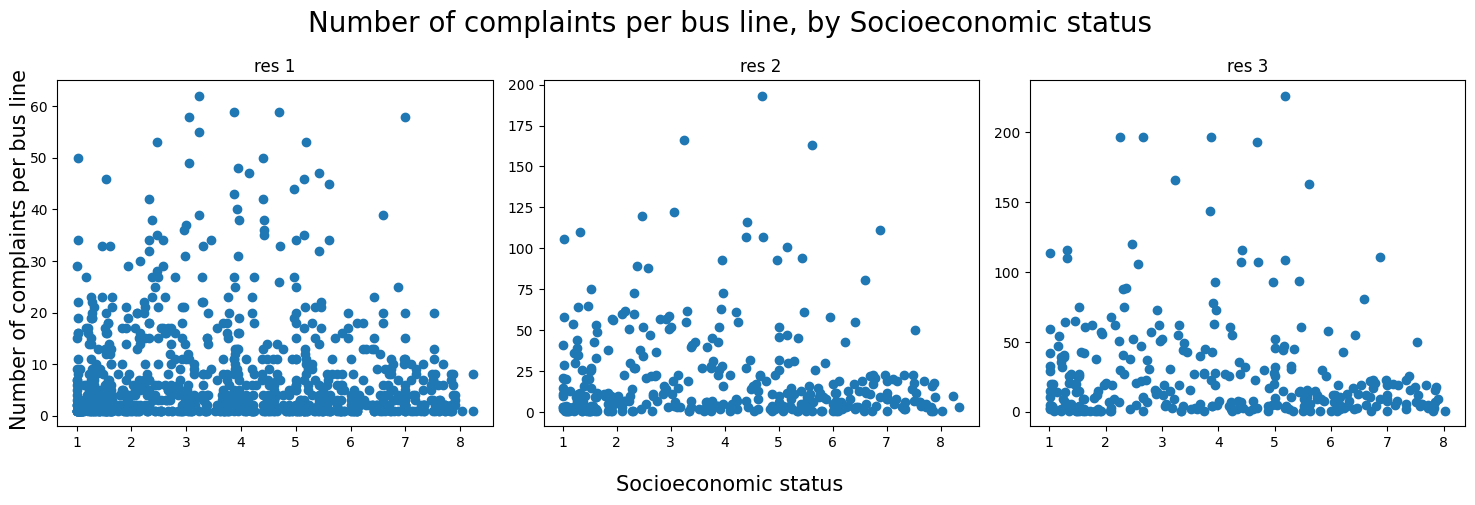

In [159]:
#socio economic status
continous_variables(
    col_name='Socioeconomic status',
    grouping_method='Socioeconomic status',
    x_suplabel='Socioeconomic status')

In [121]:
# #updated_ultraorthodox_percent
# continous_variables(
#     col_name='updated_ultraorthodox_percent',
#     grouping_method='Ultraorthodox% in route',
#     x_suplabel='ultraorthodox% in route')

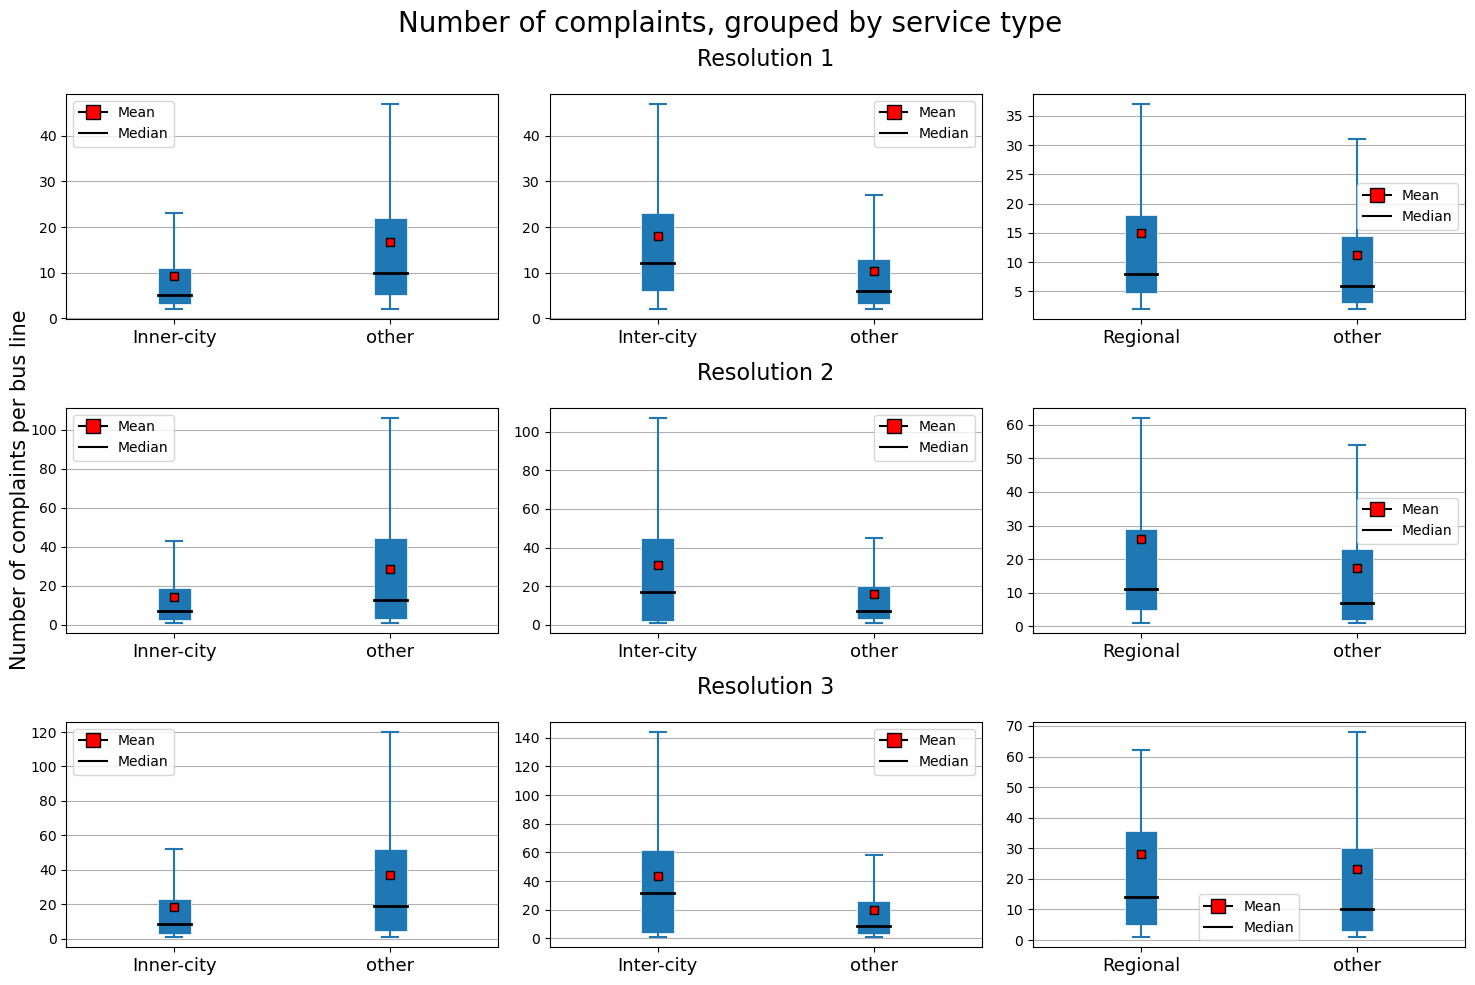

In [30]:
service_types()

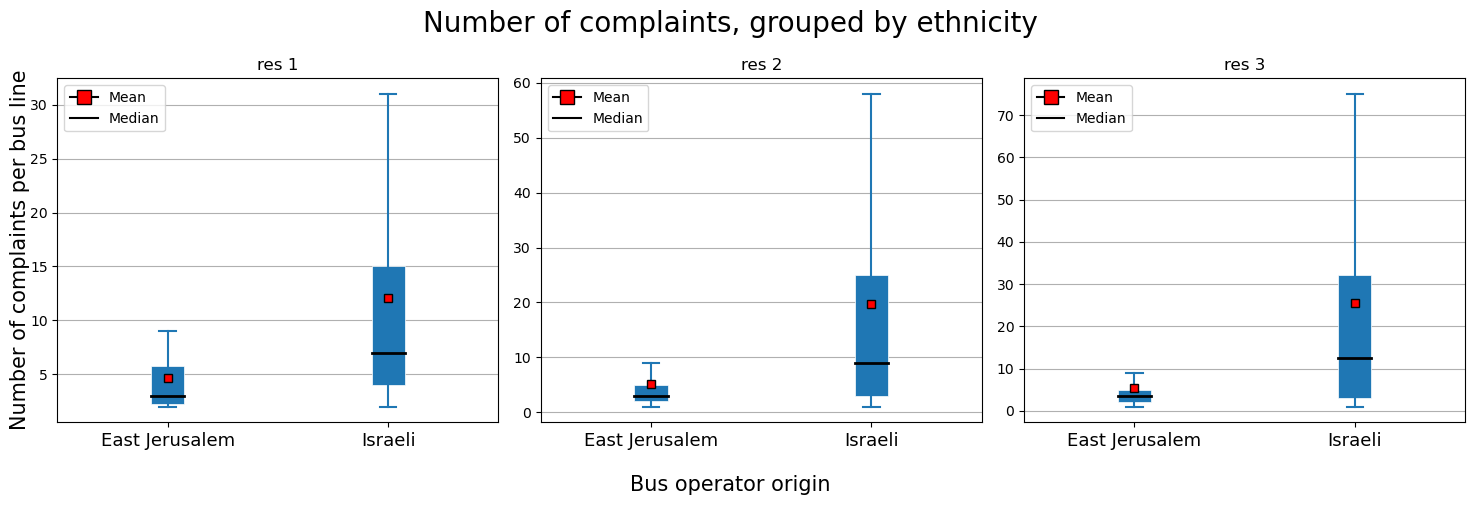

In [31]:
# eastwest
geographic_demographic(col_name='East JLM lines',
                       grouping_method='ethnicity', 
                       x_suplabel='Bus operator origin',
                       x_labels=['East Jerusalem', 'Israeli'])

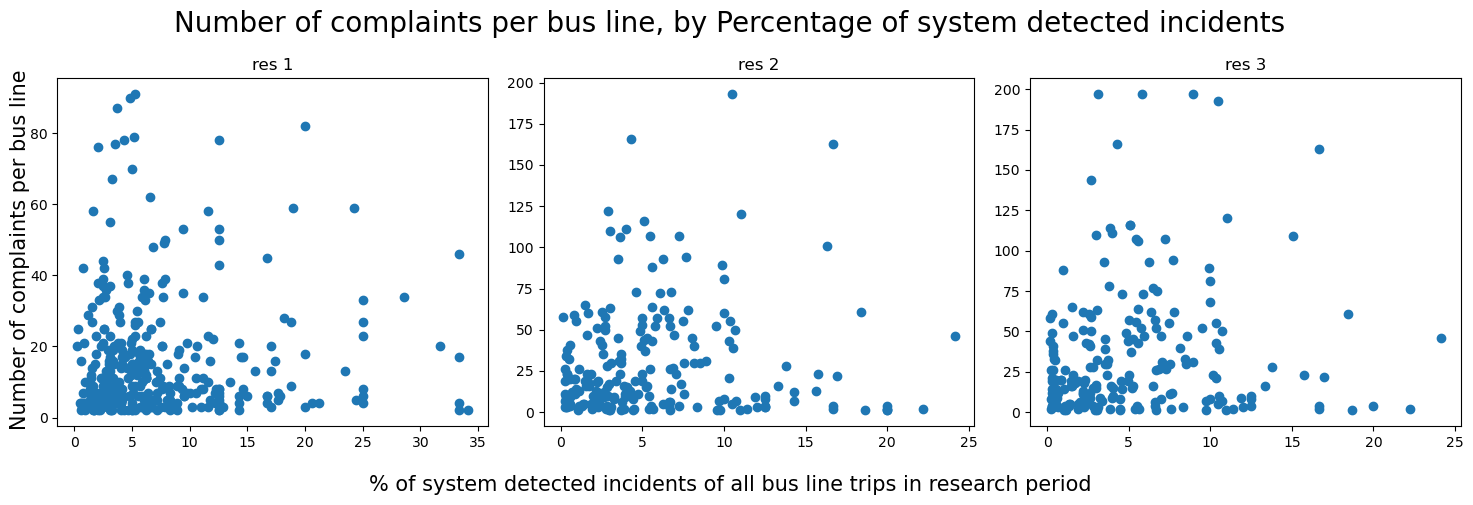

In [33]:
#not_intact_percent
#updated_ultraorthodox_percent
continous_variables(
    col_name='Percentage of system detected incidents',
    grouping_method='Percentage of system detected incidents',
    x_suplabel='% of system detected incidents of all bus line trips in research period')

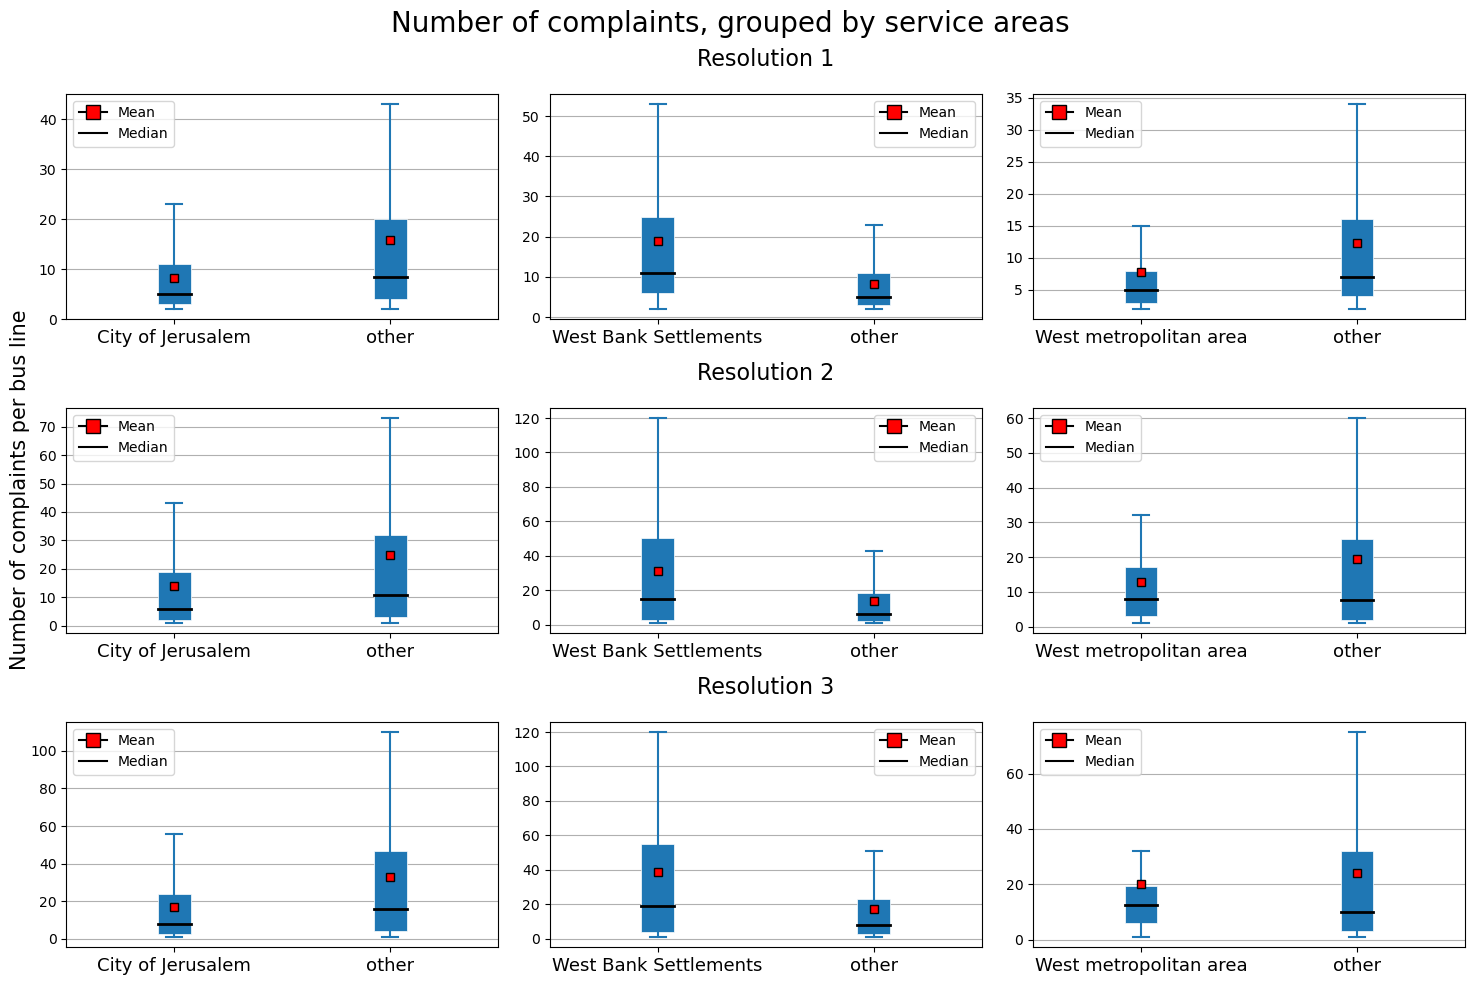

In [36]:
# service_types('geographic', ' geographic location- \nin JLM/settlements/west JLM metropolin')
service_areas()

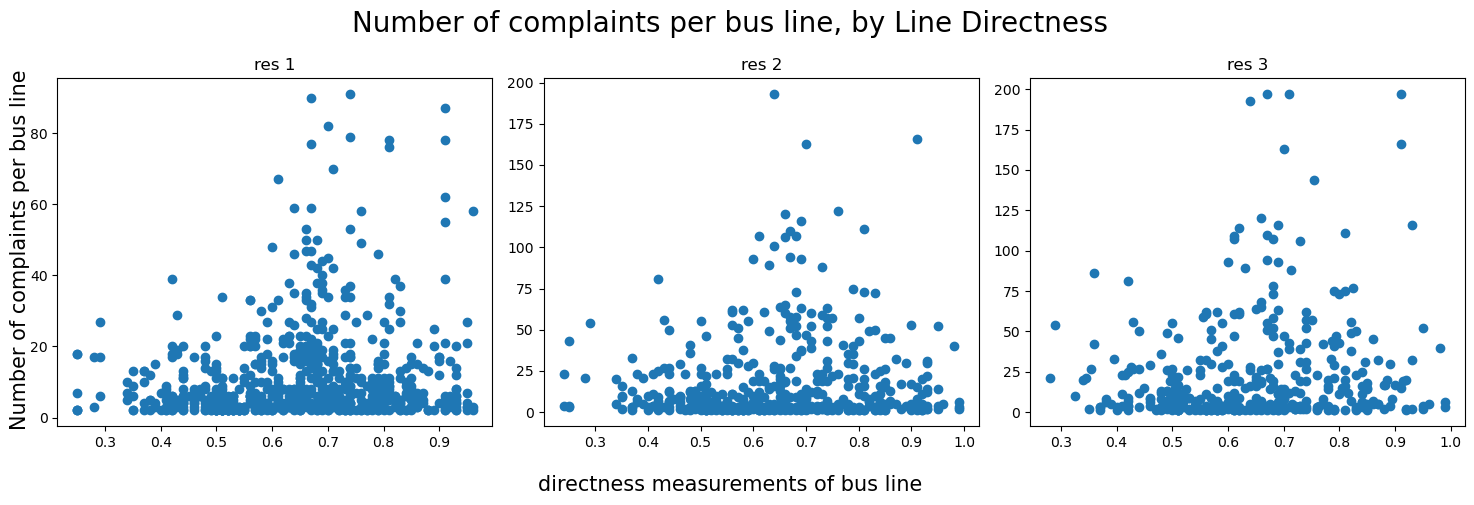

In [37]:
# directness_measurements
continous_variables(
    col_name='Line Directness',
    grouping_method='Line Directness',
    x_suplabel='directness measurements of bus line')

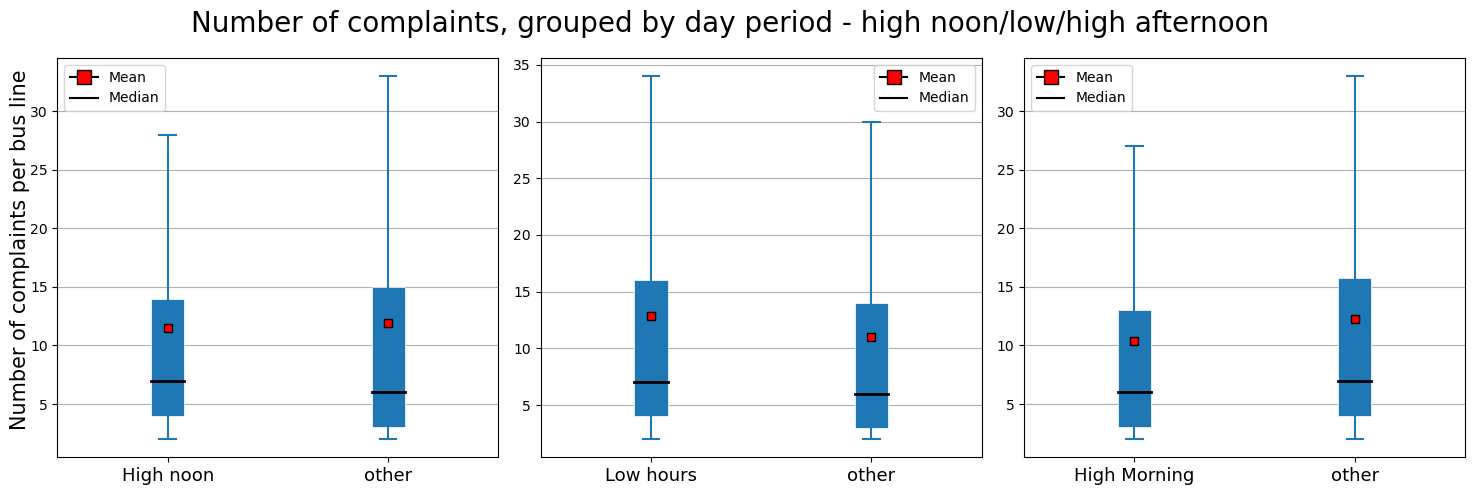

In [38]:
day_periods()

# specific comparison

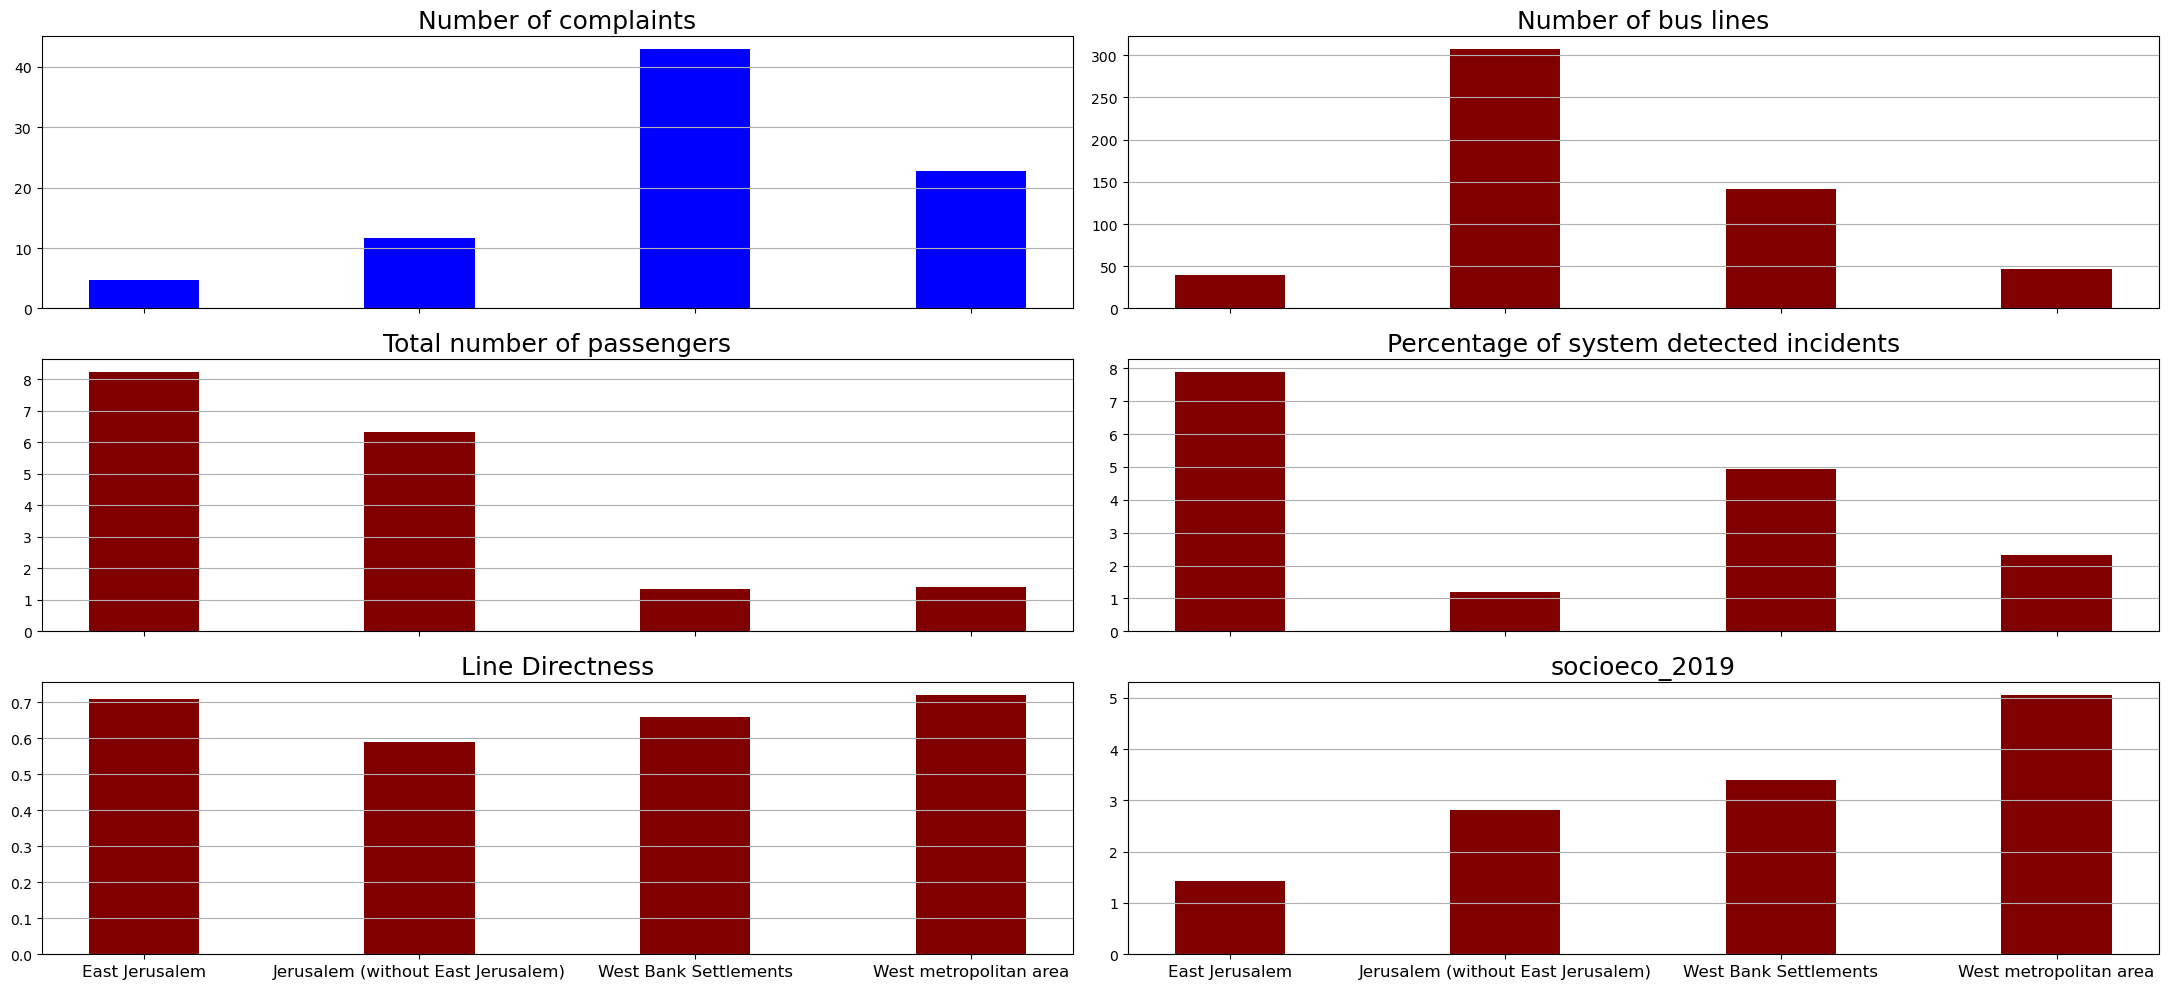

In [24]:
create_specific_comparison(res3)